In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load your dataset
df = pd.read_csv('/content/student_evaluation_results (2).csv', encoding='latin-1')

# Assuming your dataset has columns 'Questions', 'Student_Answer', and 'Final_Score'
X = df[['Questions', 'Student_Answer']]
y = df['Final_Score']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize tokenizer
tokenizer = Tokenizer()

# Fit tokenizer on training data
tokenizer.fit_on_texts(X_train['Questions'].values + X_train['Student_Answer'].values)

# Convert text data to sequences
X_train_questions_seq = tokenizer.texts_to_sequences(X_train['Questions'].values)
X_train_student_answer_seq = tokenizer.texts_to_sequences(X_train['Student_Answer'].values)

X_val_questions_seq = tokenizer.texts_to_sequences(X_val['Questions'].values)
X_val_student_answer_seq = tokenizer.texts_to_sequences(X_val['Student_Answer'].values)

# Pad sequences
max_seq_length = 100  # Define your maximum sequence length
X_train_questions_seq = pad_sequences(X_train_questions_seq, maxlen=max_seq_length)
X_train_student_answer_seq = pad_sequences(X_train_student_answer_seq, maxlen=max_seq_length)

X_val_questions_seq = pad_sequences(X_val_questions_seq, maxlen=max_seq_length)
X_val_student_answer_seq = pad_sequences(X_val_student_answer_seq, maxlen=max_seq_length)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, concatenate, Dense

# Define input layers
input_question = Input(shape=(max_seq_length,))
input_student_answer = Input(shape=(max_seq_length,))

# Embedding layer
embedding_layer = Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100)

# Apply embedding layer to inputs
embedded_question = embedding_layer(input_question)
embedded_student_answer = embedding_layer(input_student_answer)

# LSTM layer
lstm_layer = LSTM(128)

# Process each input with LSTM
question_encoded = lstm_layer(embedded_question)
student_answer_encoded = lstm_layer(embedded_student_answer)

# Concatenate LSTM outputs
concatenated = concatenate([question_encoded, student_answer_encoded])

# Output layer (regression)
output_layer = Dense(1, activation='linear')(concatenated)

# Define the model
model = Model(inputs=[input_question, input_student_answer], outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [ ]:
# Train the model
history = model.fit(
    [X_train_questions_seq, X_train_student_answer_seq],
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=([X_val_questions_seq, X_val_student_answer_seq], y_val)
)


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.5861 - mae: 0.9851 - val_loss: 2.6327 - val_mae: 1.2276
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.9958 - mae: 0.7645 - val_loss: 2.9450 - val_mae: 1.2908
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.9892 - mae: 0.7761 - val_loss: 2.7675 - val_mae: 1.2359
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7930 - mae: 0.6687 - val_loss: 2.8205 - val_mae: 1.2372
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6352 - mae: 0.5749 - val_loss: 2.7503 - val_mae: 1.2206
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.5318 - mae: 0.5048 - val_loss: 2.9167 - val_mae: 1.2655
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3990 - mae: 0.4399 - val_loss: 2.8646 - val_mae: 1.2513
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3358 - mae: 0.4037 - val_loss: 2.8487 - val_mae: 1.2363
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.348

In [ ]:
# Evaluate the model
loss, mae = model.evaluate([X_val_questions_seq, X_val_student_answer_seq], y_val)
print(f'Validation Loss: {loss:.4f}, Validation MAE: {mae:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.3421 - mae: 1.2957 
Validation Loss: 3.1149, Validation MAE: 1.3000


In [ ]:
question_text = "What is a pointer?"
student_answer_text = "A pointer is a tool used to navigate through menus on a computer screen, like a mouse pointer."

question_seq = tokenizer.texts_to_sequences([question_text])
student_answer_seq = tokenizer.texts_to_sequences([student_answer_text])

question_seq = pad_sequences(question_seq, maxlen=max_seq_length)
student_answer_seq = pad_sequences(student_answer_seq, maxlen=max_seq_length)

# Predict using the model
predicted_score = model.predict([question_seq, student_answer_seq])[0][0]
print(f'Predicted Score: {predicted_score:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted Score: 4.86


final pro with all test cases

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, concatenate
import numpy as np
import nltk
from nltk.corpus import stopwords
import pickle

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load dataset and initialize variables
# Use the correct file path and name
file_path = '/content/student_evaluation_results (2).csv'

try:
    df = pd.read_csv(file_path, encoding='latin-1')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_path, encoding='utf-16')
    except UnicodeDecodeError:
        print("Could not decode file. Please check the encoding of the file.")

max_seq_length = 100

# ... rest of your code ...
# Define model architecture
input_question = Input(shape=(max_seq_length,))
input_student_answer = Input(shape=(max_seq_length,))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Questions'].values.tolist() + df['Answers'].values.tolist() + df['Student_Answer'].values.tolist())

embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100)

embedded_question = embedding_layer(input_question)
embedded_student_answer = embedding_layer(input_student_answer)

lstm_layer = LSTM(128)

question_encoded = lstm_layer(embedded_question)
student_answer_encoded = lstm_layer(embedded_student_answer)

concatenated = concatenate([question_encoded, student_answer_encoded])

output_layer = Dense(1, activation='linear')(concatenated)

model = Model(inputs=[input_question, input_student_answer], outputs=output_layer)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Convert text to sequences and pad sequences
def prepare_data():
    questions = df['Questions'].values
    student_answers = df['Student_Answer'].values
    marks = df['Final_Score'].values

    question_sequences = tokenizer.texts_to_sequences(questions)
    student_sequences = tokenizer.texts_to_sequences(student_answers)

    question_sequences = pad_sequences(question_sequences, maxlen=max_seq_length)
    student_sequences = pad_sequences(student_sequences, maxlen=max_seq_length)

    return question_sequences, student_sequences, marks

question_sequences, student_sequences, marks = prepare_data()

# Train model
history = model.fit(
    [question_sequences, student_sequences],
    marks,
    epochs=5,  # Adjust as needed
    batch_size=32,
    validation_split=0.2
)


# Function to remove stopwords
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Function to evaluate answers with logic to ensure correct question-answer matching
def evaluate_answer(question, student_answer):
    matching_rows = df[df['Questions'].str.lower() == question.lower()]

    if not matching_rows.empty:
        # Remove stopwords from the student's answer
        cleaned_student_answer = remove_stopwords(student_answer)

        # Check if the student's answer matches any model answer in the matching rows
        if any(matching_rows['Answers'].str.lower().str.contains(cleaned_student_answer.lower(), na=False)):
            return matching_rows[matching_rows['Answers'].str.lower().str.contains(cleaned_student_answer.lower(), na=False)]['Final_Score'].values[0]
        else:
            question_seq = tokenizer.texts_to_sequences([question])
            student_seq = tokenizer.texts_to_sequences([cleaned_student_answer])
            question_seq = pad_sequences(question_seq, maxlen=max_seq_length)
            student_seq = pad_sequences(student_seq, maxlen=max_seq_length)
            predicted_marks = model.predict([question_seq, student_seq])[0][0]

            # Convert list of keywords to a set of keywords
            model_answer_keywords = set(keyword for answer in matching_rows['Answers'].values for keyword in remove_stopwords(answer).lower().split())
            student_answer_keywords = set(cleaned_student_answer.lower().split())
            overlap = set.intersection(model_answer_keywords, student_answer_keywords)

            if len(overlap) >= 4:
                print("Keyword overlap found:", overlap)
                print(overlap)
                return predicted_marks
            else:
                print("Insufficient keyword overlap. Overlap:", overlap)
                print(overlap)
                return 0
    else:
        return 0
question = "What is a pointer?"
student_answer = "Downloading package stopwords to /root/nltk_data...[nltk_data]   Unzipping corpora/stopwords.zip.."
marks = evaluate_answer(question, student_answer)
print(f"Marks: {marks}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 791ms/step - loss: 47.6439 - mae: 6.4010 - val_loss: 20.8542 - val_mae: 3.3524
Epoch 2/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 481ms/step - loss: 4.3477 - mae: 1.7768 - val_loss: 24.1798 - val_mae: 3.6016
Epoch 3/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 535ms/step - loss: 3.6058 - mae: 1.5102 - val_loss: 21.7908 - val_mae: 3.4230
Epoch 4/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 760ms/step - loss: 3.4751 - mae: 1.5677 - val_loss: 23.8682 - val_mae: 3.5799
Epoch 5/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 307ms/step - loss: 3.8539 - mae: 1.6096 - val_loss: 21.2040 - val_mae: 3.3719
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
Insufficient keyword overlap. Overlap: set()
set()
Marks: 0


In [ ]:
question = "What is a pointer?"
student_answer="kljljkljljlj; kjlkjlj kjljl;  "
marks = evaluate_answer(question, student_answer)
print(f"Marks: {marks}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Insufficient keyword overlap. Overlap: set()
set()
Marks: 0


In [ ]:
question = "What is recursion?"
student_answer ="Recursion is when a function calls itself to solve a problem."
marks = evaluate_answer(question, student_answer)
print(f"Marks: {marks}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Insufficient keyword overlap. Overlap: {'calls', 'recursion', 'function'}
{'calls', 'recursion', 'function'}
Marks: 0


final 16-08

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, concatenate
import numpy as np
import nltk
from nltk.corpus import stopwords
import pickle

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load dataset and initialize variables
file_path = '/content/updated_dataset.csv'

try:
    df = pd.read_csv(file_path, encoding='latin-1')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_path, encoding='utf-16')
    except UnicodeDecodeError:
        print("Could not decode file. Please check the encoding of the file.")

max_seq_length = 100

# Define model architecture
input_question = Input(shape=(max_seq_length,))
input_student_answer = Input(shape=(max_seq_length,))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Questions'].values.tolist() + df['Answers'].values.tolist() + df['Student_Answer'].values.tolist())

embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100)

embedded_question = embedding_layer(input_question)
embedded_student_answer = embedding_layer(input_student_answer)

lstm_layer = LSTM(128)

question_encoded = lstm_layer(embedded_question)
student_answer_encoded = lstm_layer(embedded_student_answer)

concatenated = concatenate([question_encoded, student_answer_encoded])

output_layer = Dense(1, activation='linear')(concatenated)

model = Model(inputs=[input_question, input_student_answer], outputs=output_layer)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Convert text to sequences and pad sequences
def prepare_data():
    questions = df['Questions'].values
    student_answers = df['Student_Answer'].values
    marks = df['Final_Score'].values

    question_sequences = tokenizer.texts_to_sequences(questions)
    student_sequences = tokenizer.texts_to_sequences(student_answers)

    question_sequences = pad_sequences(question_sequences, maxlen=max_seq_length)
    student_sequences = pad_sequences(student_sequences, maxlen=max_seq_length)

    return question_sequences, student_sequences, marks

question_sequences, student_sequences, marks = prepare_data()

# Train model
history = model.fit(
    [question_sequences, student_sequences],
    marks,
    epochs=50,  # Adjust as needed
    batch_size=32,
    validation_split=0.2
)

# Function to remove stopwords
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Function to evaluate answers with logic to ensure correct question-answer matching
# Function to evaluate answers with logic to ensure correct question-answer matching
def evaluate_answer(question, student_answer):
    # Check if the student's answer is empty or consists only of spaces
    if not student_answer.strip():
        print("Empty or invalid answer provided.")
        return 0  # Return 0 marks for empty or invalid answers

    matching_rows = df[df['Questions'].str.lower() == question.lower()]

    if not matching_rows.empty:
        # Remove stopwords from the student's answer
        cleaned_student_answer = remove_stopwords(student_answer)

        # Check if the student's answer matches any model answer in the matching rows
        if any(matching_rows['Answers'].str.lower().str.contains(cleaned_student_answer.lower(), na=False)):
            return matching_rows[matching_rows['Answers'].str.lower().str.contains(cleaned_student_answer.lower(), na=False)]['Final_Score'].values[0]
        else:
            question_seq = tokenizer.texts_to_sequences([question])
            student_seq = tokenizer.texts_to_sequences([cleaned_student_answer])
            question_seq = pad_sequences(question_seq, maxlen=max_seq_length)
            student_seq = pad_sequences(student_seq, maxlen=max_seq_length)
            predicted_marks = model.predict([question_seq, student_seq])[0][0]

            # Convert list of keywords to a set of keywords
            model_answer_keywords = set(keyword for answer in matching_rows['Answers'].values for keyword in remove_stopwords(answer).lower().split())
            student_answer_keywords = set(cleaned_student_answer.lower().split())
            overlap = set.intersection(model_answer_keywords, student_answer_keywords)

            if len(overlap) >= 4:
                print("Keyword overlap found:", overlap)
                return predicted_marks
            elif len(overlap) > 0:
                print(f"Partial keyword overlap ({len(overlap)} keywords). Assigning partial marks.")
                return predicted_marks * (len(overlap) / len(model_answer_keywords))
            else:
                print("No significant keyword overlap. Assigning 0 marks.")
                return 0
    else:
        return 0

# Test with empty answer
question = "What is a pointer?"
student_answer = "  mljljljl lkjlkj lkjlk"  # Empty or invalid answer
marks = evaluate_answer(question, student_answer)
print(f"Marks: {marks}")


# Test with example
question = "What is a pointer?"
student_answer = "A pointer is a variable that stores the memory address of another variable."
marks = evaluate_answer(question, student_answer)
print(f"Marks: {marks}")


Epoch 1/50


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 64.1879 - mae: 7.8598 - val_loss: 61.6310 - val_mae: 7.4385
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - loss: 63.0411 - mae: 7.7867 - val_loss: 60.7201 - val_mae: 7.3733
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 61.7425 - mae: 7.7031 - val_loss: 59.3872 - val_mae: 7.2780
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 59.9907 - mae: 7.5885 - val_loss: 57.1795 - val_mae: 7.1197
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 57.3320 - mae: 7.4108 - val_loss: 53.1887 - val_mae: 6.8282
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 52.8931 - mae: 7.1028 - val_loss: 45.8014 - val_mae: 6.2599
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 45.2041 - mae: 6.5323 - val_loss: 34.7292 - val_mae: 5.3030
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 33.9928 - mae: 5.5955 - val_loss: 24.1291 - val_mae: 4.1863
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 22.5879 - mae: 

In [ ]:
# Check if the question exists in the dataset and process accordingly
def evaluate_answer(question, student_answer):
    matching_rows = df[df['Question'].str.lower() == question.lower()] # Changed 'Questions' to 'Question'

    # Step 4: Debugging matching rows
    if not matching_rows.empty:
        print("Matching row found in dataset.")
        if student_answer.lower().strip() in matching_rows['Answers'].str.lower().values:
            print("Exact match for student answer.")
            return matching_rows['Total_Marks'].values[0]  # Return marks from dataset
        else:
            print("Answer does not match exactly.")
            return model.predict([padded_question, padded_answer])[0]  # Use model to predict marks
    else:
        print("No matching question found in the dataset.")
        return model.predict([padded_question, padded_answer])[0]  # Use model to predict marks

In [ ]:
# make sure keras is installed
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer # Use tensorflow.keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
df = pd.read_csv('/content/new_updated_dataset.csv')

# Initialize tokenizer with a max number of words and fit on the dataset questions
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Question'])

# Function to predict marks for a new dataset
def predict_marks_for_new_dataset(question, student_answer, model):
    # Step 1: Debugging print statements
    print(f"Question: {question}")
    print(f"Student Answer: {student_answer}")

    # Check if the student answer is empty or invalid
    if not student_answer.strip():
        print("Empty or invalid answer detected.")
        return 0  # Return 0 marks for empty or invalid answers

    # Convert question and student_answer to sequences
    question_sequence = tokenizer.texts_to_sequences([question])
    student_answer_sequence = tokenizer.texts_to_sequences([student_answer])

    # Step 2: Debugging tokenization and padding
    print(f"Tokenized Question: {question_sequence}")
    print(f"Tokenized Answer: {student_answer_sequence}")

    # Pad the sequences to the maximum sequence length
    max_seq_length = 100
    padded_question = pad_sequences(question_sequence, maxlen=max_seq_length, padding='post')
    padded_answer = pad_sequences(student_answer_sequence, maxlen=max_seq_length, padding='post')

    # Step 3: Debugging padded sequences
    print(f"Padded Question: {padded_question}")
    print(f"Padded Answer: {padded_answer}")

    # Check if the question exists in the dataset and process accordingly
    def evaluate_answer(question, student_answer):
        matching_rows = df[df['Questions'].str.lower() == question.lower()]

        # Step 4: Debugging matching rows
        if not matching_rows.empty:
            print("Matching row found in dataset.")
            if student_answer.lower().strip() in matching_rows['Answers'].str.lower().values:
                print("Exact match for student answer.")
                return matching_rows['Total_Marks'].values[0]  # Return marks from dataset
            else:
                print("Answer does not match exactly.")
                return model.predict([padded_question, padded_answer])[0]  # Use model to predict marks
        else:
            print("No matching question found in the dataset.")
            return model.predict([padded_question, padded_answer])[0]  # Use model to predict marks

    # Step 5: Debugging final output
    predicted_marks = evaluate_answer(question, student_answer)
    print(f"Predicted Marks: {predicted_marks}")

    # Handle NaN cases explicitly
    if pd.isna(predicted_marks):
        print("NaN detected in predicted marks. Returning 0.")
        return 0

    return predicted_marks

# Example of usage
# Assuming you have a trained model loaded as `model`
question = "Can you execute a C program without using the main() function?"
student_answer = "For the execution of a C program, the main() function is needed. Without this function, the program will be compiled but can not be executed.."
predicted_marks = predict_marks_for_new_dataset(question, student_answer, model)

Question: Can you execute a C program without using the main() function?
Student Answer: For the execution of a C program, the main() function is needed. Without this function, the program will be compiled but can not be executed..
Tokenized Question: [[20, 15, 167, 7, 3, 33, 168, 169, 6, 170, 21]]
Tokenized Answer: [[1, 6, 1, 9, 7, 3, 33, 6, 170, 21, 5, 1, 168, 1, 21, 6, 33, 1, 1, 1, 1, 20, 1, 1, 1]]
Padded Question: [[ 20  15 167   7   3  33 168 169   6 170  21   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]]
Padded Answer: [[  1   6   1   9   7   3  33   6 170  21   5   1 168   1  21   6  33   1
    1   1   1  20   1   1   1   0   0   0   0   0   0   0   0   0   0   0
 

KeyError: 'Questions'

In [ ]:
!pip install keras

lstm


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, concatenate
import numpy as np
import nltk
from nltk.corpus import stopwords
import pickle

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the original dataset for training
file_path = '/content/student_evaluation_results (2).csv'

try:
    df = pd.read_csv(file_path, encoding='latin-1')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_path, encoding='utf-16')
    except UnicodeDecodeError:
        print("Could not decode file. Please check the encoding of the file.")

# Load the new dataset for predictions
prediction_file_path = '/content/new_updated_dataset.csv'
#The file is an excel file, so it must be read with read_excel
try:
  new_df = pd.read_csv(prediction_file_path)
except UnicodeDecodeError:
    try:
        new_df = pd.read_excel(prediction_file_path, encoding='latin-1')
    except UnicodeDecodeError:
        try:
            new_df = pd.read_excel(prediction_file_path, encoding='utf-16')
        except UnicodeDecodeError:
            print("Could not decode file. Please check the encoding of the file.")


max_seq_length = 100

# Define model architecture
input_question = Input(shape=(max_seq_length,))
input_student_answer = Input(shape=(max_seq_length,))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Questions'].values.tolist() + df['Answers'].values.tolist() + df['Student_Answer'].values.tolist())

embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100)

embedded_question = embedding_layer(input_question)
embedded_student_answer = embedding_layer(input_student_answer)

lstm_layer = LSTM(128)

question_encoded = lstm_layer(embedded_question)
student_answer_encoded = lstm_layer(embedded_student_answer)

concatenated = concatenate([question_encoded, student_answer_encoded])

output_layer = Dense(1, activation='linear')(concatenated)

model = Model(inputs=[input_question, input_student_answer], outputs=output_layer)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Convert text to sequences and pad sequences
def prepare_data():
    questions = df['Questions'].values
    student_answers = df['Student_Answer'].values
    marks = df['Final_Score'].values

    question_sequences = tokenizer.texts_to_sequences(questions)
    student_sequences = tokenizer.texts_to_sequences(student_answers)

    question_sequences = pad_sequences(question_sequences, maxlen=max_seq_length)
    student_sequences = pad_sequences(student_sequences, maxlen=max_seq_length)

    return question_sequences, student_sequences, marks

question_sequences, student_sequences, marks = prepare_data()

# Train the model
history = model.fit(
    [question_sequences, student_sequences],
    marks,
    epochs=5,  # Adjust as needed
    batch_size=32,
    validation_split=0.2
)

# Function to remove stopwords
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
# Function to evaluate answers with logic to ensure correct question-answer matching
def evaluate_answer(question, student_answer):
    if not student_answer.strip():
        print("Empty or invalid answer provided.")
        return 0  # Return 0 marks for empty or invalid answers

    matching_rows = df[df['Questions'].str.lower() == question.lower()]

    if not matching_rows.empty:
        cleaned_student_answer = remove_stopwords(student_answer)

        # Check if the student's answer matches any model answer in the matching rows
        if any(matching_rows['Answers'].str.lower().str.contains(cleaned_student_answer.lower(), na=False)):
            return matching_rows[matching_rows['Answers'].str.lower().str.contains(cleaned_student_answer.lower(), na=False)]['Final_Score'].values[0]
        else:
            question_seq = tokenizer.texts_to_sequences([question])
            student_seq = tokenizer.texts_to_sequences([cleaned_student_answer])
            question_seq = pad_sequences(question_seq, maxlen=max_seq_length)
            student_seq = pad_sequences(student_seq, maxlen=max_seq_length)
            predicted_marks = model.predict([question_seq, student_seq])[0][0]

            model_answer_keywords = set(keyword for answer in matching_rows['Answers'].values for keyword in remove_stopwords(answer).lower().split())
            student_answer_keywords = set(cleaned_student_answer.lower().split())
            overlap = set.intersection(model_answer_keywords, student_answer_keywords)

            if len(overlap) >= 4:
                print("Keyword overlap found:", overlap)
                return predicted_marks
            elif len(overlap) > 0:
                print(f"Partial keyword overlap ({len(overlap)} keywords). Assigning partial marks.")
                return predicted_marks * (len(overlap) / len(model_answer_keywords))
            else:
                print("No significant keyword overlap. Assigning 0 marks.")
                return 0
    else:
        return 0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 895ms/step - loss: 49.8861 - mae: 6.6081 - val_loss: 25.6287 - val_mae: 3.6955
Epoch 2/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 299ms/step - loss: 3.3437 - mae: 1.5435 - val_loss: 18.8448 - val_mae: 3.1928
Epoch 3/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 461ms/step - loss: 2.6557 - mae: 1.2935 - val_loss: 15.9030 - val_mae: 3.1073
Epoch 4/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 303ms/step - loss: 2.5518 - mae: 1.2174 - val_loss: 14.0487 - val_mae: 2.8646
Epoch 5/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 301ms/step - loss: 1.9947 - mae: 1.1513 - val_loss: 12.6022 - val_mae: 2.9613


In [ ]:
def evaluate_answer(question, student_answer):
    if not student_answer.strip():
        print("Empty or invalid answer provided.")
        return 0  # Return 0 marks for empty or invalid answers

    matching_rows = df[df['Questions'].str.lower() == question.lower()]

    if not matching_rows.empty:
        cleaned_student_answer = remove_stopwords(student_answer)

        # Escape special characters in student_answer to treat it as literal text
        cleaned_student_answer = re.escape(cleaned_student_answer)

        # Check if the student's answer matches any model answer in the matching rows
        if any(matching_rows['Answers'].str.lower().str.contains(cleaned_student_answer.lower(), na=False, regex=False)):
            return matching_rows[matching_rows['Answers'].str.lower().str.contains(cleaned_student_answer.lower(), na=False, regex=False)]['Final_Score'].values[0]
        else:
            question_seq = tokenizer.texts_to_sequences([question])
            student_seq = tokenizer.texts_to_sequences([cleaned_student_answer])
            question_seq = pad_sequences(question_seq, maxlen=max_seq_length)
            student_seq = pad_sequences(student_seq, maxlen=max_seq_length)
            predicted_marks = model.predict([question_seq, student_seq])[0][0]

            model_answer_keywords = set(keyword for answer in matching_rows['Answers'].values for keyword in remove_stopwords(answer).lower().split())
            student_answer_keywords = set(cleaned_student_answer.lower().split())
            overlap = set.intersection(model_answer_keywords, student_answer_keywords)

    else:
        return 0

In [ ]:
import re
# Predict marks for the new dataset
def predict_marks_for_new_dataset(new_df):
    predicted_marks = []
    for index, row in new_df.iterrows():
        question = row['Question']
        student_answer = row['Student_ans']
        marks = evaluate_answer(question, student_answer)
        predicted_marks.append(marks)

    new_df['Predicted_Marks'] = predicted_marks
    return new_df

# Make predictions for the new dataset
new_df_with_marks = predict_marks_for_new_dataset(new_df)

# Save the new dataset with predicted marks to a new CSV file
new_df_with_marks.to_csv('/content/new_dataset_with_predicted_marks.csv', index=False)

# Print the first few rows of the new dataset to verify
print(new_df_with_marks.head())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, concatenate
import numpy as np
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load dataset and initialize variables
try:
    df = pd.read_csv('/content/student_evaluation_results (2).csv', encoding='latin-1')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('/content/student_evaluation_results (2).csv', encoding='utf-16')
    except UnicodeDecodeError:
        print("Could not decode file. Please check the encoding of the file.")

max_seq_length = 100

# Define model architecture
input_question = Input(shape=(max_seq_length,))
input_student_answer = Input(shape=(max_seq_length,))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Questions'].values.tolist() + df['Answers'].values.tolist() + df['Student_Answer'].values.tolist())

embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100)

embedded_question = embedding_layer(input_question)
embedded_student_answer = embedding_layer(input_student_answer)

lstm_layer = LSTM(128)

question_encoded = lstm_layer(embedded_question)
student_answer_encoded = lstm_layer(embedded_student_answer)

concatenated = concatenate([question_encoded, student_answer_encoded])

output_layer = Dense(1, activation='linear')(concatenated)

model = Model(inputs=[input_question, input_student_answer], outputs=output_layer)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Convert text to sequences and pad sequences
def prepare_data():
    questions = df['Questions'].values
    student_answers = df['Student_Answer'].values
    marks = df['Final_Score'].values

    question_sequences = tokenizer.texts_to_sequences(questions)
    student_sequences = tokenizer.texts_to_sequences(student_answers)

    question_sequences = pad_sequences(question_sequences, maxlen=max_seq_length)
    student_sequences = pad_sequences(student_sequences, maxlen=max_seq_length)

    return question_sequences, student_sequences, marks

question_sequences, student_sequences, marks = prepare_data()

# Train model
history = model.fit(
    [question_sequences, student_sequences],
    marks,
    epochs=48,  # Adjust as needed
    batch_size=32,
    validation_split=0.2
)
import pickle
# Export the Trained Model using Pickle
pickle.dump(model, open('answer_evaluation_model.pkl', 'wb'))


# Function to remove stopwords
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
def evaluate_answer(question, student_answer):
    # Find rows with matching questions
    matching_rows = df[df['Questions'].str.lower() == question.lower()]

    if not matching_rows.empty:
        # Remove stopwords from the student's answer
        cleaned_student_answer = remove_stopwords(student_answer)

        # Ensure the cleaned student answer is not too short
        if len(cleaned_student_answer.split()) < 5:  # Example minimum length of 5 words
            print("Answer is too short.")
            return 0

        # Check if the cleaned student's answer matches any model answer in the matching rows
        if any(matching_rows['Answers'].str.lower().str.contains(cleaned_student_answer.lower(), na=False)):
            return matching_rows[matching_rows['Answers'].str.lower().str.contains(cleaned_student_answer.lower(), na=False)]['Final_Score'].values[0]
        else:
            # Convert question and student's answer to sequences
            question_seq = tokenizer.texts_to_sequences([question])
            student_seq = tokenizer.texts_to_sequences([cleaned_student_answer])
            question_seq = pad_sequences(question_seq, maxlen=max_seq_length)
            student_seq = pad_sequences(student_seq, maxlen=max_seq_length)

            # Predict the marks using the model
            predicted_marks = model.predict([question_seq, student_seq])[0][0]

            # Calculate keyword overlap for all matching rows
            overlaps = []
            for _, row in matching_rows.iterrows():
                model_answer_keywords = set(remove_stopwords(row['Answers']).lower().split())
                student_answer_keywords = set(cleaned_student_answer.lower().split())
                overlap = model_answer_keywords.intersection(student_answer_keywords)
                overlaps.append(len(overlap))

            max_overlap = max(overlaps, default=0)

            if max_overlap >= 4:  # Example threshold of 4 keywords
                print("Keyword overlap found:", max_overlap)
                return predicted_marks
            else:
                print("Insufficient keyword overlap. Overlap:", max_overlap)
                return 0
    else:
        print("No matching question found.")
        return 0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/48
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 581ms/step - loss: 50.7176 - mae: 6.7486 - val_loss: 18.7714 - val_mae: 3.3148
Epoch 2/48
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 321ms/step - loss: 4.3010 - mae: 1.6363 - val_loss: 23.4643 - val_mae: 3.5441
Epoch 3/48
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 389ms/step - loss: 4.0874 - mae: 1.6184 - val_loss: 21.7716 - val_mae: 3.4125
Epoch 4/48
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 397ms/step - loss: 2.8400 - mae: 1.3706 - val_loss: 18.4199 - val_mae: 3.2212
Epoch 5/48
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 530ms/step - loss: 2.1994 - mae: 1.1851 - val_loss: 16.0726 - val_mae: 3.1747
Epoch 6/48
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 310ms/step - loss: 2.2677 - mae: 1.1602 - val_loss: 14.0956 - val_mae: 2.9815
Epoch 7/48
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 492ms/step - loss: 2.2531 - mae: 1.1372 - val_loss: 12.2985 - val_mae: 2.9418
Epoch 8/48
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 315ms/step - loss: 1.9609 - mae: 1.0876 - val_loss: 11.9594 - val_mae: 2.8706
Epoch 9/48
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 479m

In [ ]:
# Example usage
question = "What is a pointer?"
student_answer = "  "
marks = evaluate_answer(question, student_answer)
print(f"Marks: {marks}")

Marks: 0


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, model_from_json, load_model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, concatenate
import numpy as np
import nltk
from nltk.corpus import stopwords
import json
import pickle

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load dataset and initialize variables
try:
    df = pd.read_csv('/content/student_evaluation_results (2).csv', encoding='latin-1')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('/content/student_evaluation_results (2).csv', encoding='utf-16')
    except UnicodeDecodeError:
        print("Could not decode file. Please check the encoding of the file.")

max_seq_length = 100

# Define model architecture
input_question = Input(shape=(max_seq_length,))
input_student_answer = Input(shape=(max_seq_length,))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Questions'].values.tolist() + df['Answers'].values.tolist() + df['Student_Answer'].values.tolist())

embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100)

embedded_question = embedding_layer(input_question)
embedded_student_answer = embedding_layer(input_student_answer)

lstm_layer = LSTM(128)

question_encoded = lstm_layer(embedded_question)
student_answer_encoded = lstm_layer(embedded_student_answer)

concatenated = concatenate([question_encoded, student_answer_encoded])

output_layer = Dense(1, activation='linear')(concatenated)

model = Model(inputs=[input_question, input_student_answer], outputs=output_layer)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Convert text to sequences and pad sequences
def prepare_data():
    questions = df['Questions'].values
    student_answers = df['Student_Answer'].values
    marks = df['Final_Score'].values

    question_sequences = tokenizer.texts_to_sequences(questions)
    student_sequences = tokenizer.texts_to_sequences(student_answers)

    question_sequences = pad_sequences(question_sequences, maxlen=max_seq_length)
    student_sequences = pad_sequences(student_sequences, maxlen=max_seq_length)

    return question_sequences, student_sequences, marks

question_sequences, student_sequences, marks = prepare_data()

# Train model
history = model.fit(
    [question_sequences, student_sequences],
    marks,
    epochs=80,  # Adjust as needed
    batch_size=32,
    validation_split=0.2
)

# Save model architecture and weights
model_json = model.to_json()
with open('model_architecture.json', 'w') as json_file:
    json.dump(model_json, json_file)

with open('model_weights.pkl', 'wb') as f:
    pickle.dump(model.get_weights(), f)

# Load model architecture and weights with pickle
with open('model_architecture.json', 'r') as json_file:
    model_json = json.load(json_file)

model = model_from_json(model_json)

with open('model_weights.pkl', 'rb') as f:
    weights = pickle.load(f)

model.set_weights(weights)

# Function to remove stopwords
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Function to evaluate answers with logic to ensure correct question-answer matching
def evaluate_answer(question, student_answer):
    matching_rows = df[df['Questions'].str.lower() == question.lower()]

    if not matching_rows.empty:
        # Remove stopwords from the student's answer
        cleaned_student_answer = remove_stopwords(student_answer)

        # Check if the student's answer matches any model answer in the matching rows
        if any(matching_rows['Answers'].str.lower().str.contains(cleaned_student_answer.lower(), na=False)):
            return matching_rows[matching_rows['Answers'].str.lower().str.contains(cleaned_student_answer.lower(), na=False)]['Final_Score'].values[0]
        else:
            question_seq = tokenizer.texts_to_sequences([question])
            student_seq = tokenizer.texts_to_sequences([cleaned_student_answer])
            question_seq = pad_sequences(question_seq, maxlen=max_seq_length)
            student_seq = pad_sequences(student_seq, maxlen=max_seq_length)
            predicted_marks = model.predict([question_seq, student_seq])[0][0]

            # Calculate keyword overlap for all matching rows
            overlaps = []
            for _, row in matching_rows.iterrows():
                model_answer_keywords = set(remove_stopwords(row['Answers']).lower().split())
                student_answer_keywords = set(cleaned_student_answer.lower().split())
                overlap = model_answer_keywords.intersection(student_answer_keywords)
                overlaps.append(len(overlap))

            max_overlap = max(overlaps, default=0)

            if max_overlap >= 4:
                print("Keyword overlap found:", max_overlap)
                return predicted_marks
            else:
                print("Insufficient keyword overlap. Overlap:", max_overlap)
                return 0
    else:
        return 0

# Example usage
question = "What is a pointer?"
student_answer = "A pointer is a type of variable that holds the memory address of another variable."
marks = evaluate_answer(question, student_answer)
print(f"Marks: {marks}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 701ms/step - loss: 53.0030 - mae: 6.8525 - val_loss: 23.6946 - val_mae: 3.5685
Epoch 2/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 387ms/step - loss: 4.2512 - mae: 1.7056 - val_loss: 21.2015 - val_mae: 3.3853
Epoch 3/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 462ms/step - loss: 3.6131 - mae: 1.5313 - val_loss: 23.8787 - val_mae: 3.5803
Epoch 4/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 384ms/step - loss: 3.6115 - mae: 1.5726 - val_loss: 21.7081 - val_mae: 3.4067
Epoch 5/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 565ms/step - loss: 3.3913 - mae: 1.4719 - val_loss: 20.0126 - val_mae: 3.3127
Epoch 6/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 379ms/step - loss: 2.6869 - mae: 1.2538 - val_loss: 19.5985 - val_mae: 3.2672
Epoch 7/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 550ms/step - loss: 2.4274 - mae: 1.2501 - val_loss: 17.9401 - val_mae: 3.3751
Epoch 8/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 355ms/step - loss: 2.5985 - mae: 1.2414 - val_loss: 15.7162 - val_mae: 3.1508
Epoch 9/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 566m

TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
import numpy as np
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load dataset
df = pd.read_csv('/content/student_evaluation_results (2).csv', encoding='latin-1')

# Define tokenizer and max sequence length
max_seq_length = 100
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Questions'].values.tolist() + df['Answers'].values.tolist() + df['Student_Answer'].values.tolist())

# Load trained model
model = load_model('answer_model.h5')

# Prepare input data
def preprocess_text(texts, tokenizer, max_seq_length):
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_seq_length)
    return padded_sequences

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Example inputs
question = "What is a pointer?"
student_answer = "A pointer is a type of variable that holds the memory address of another variable."

# Preprocess inputs
cleaned_student_answer = remove_stopwords(student_answer)
question_seq = preprocess_text([question], tokenizer, max_seq_length)
student_seq = preprocess_text([cleaned_student_answer], tokenizer, max_seq_length)

# Predict
predicted_marks = model.predict([question_seq, student_seq])[0][0]
print(f"Predicted Marks: {predicted_marks}")


In [ ]:
question = "Difference between strdup and strcpy?"
student_answer ="Both copy a string. strcpy wants a buffer to copy into. strdup allocates a buffer using malloc(). Unlike strcpy(), strdup() is not specified by ANSI ."
marks = evaluate_answer(question, student_answer)
print(f"Marks: {marks}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

<ipython-input-32-acbc9ed681ba>:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if any(matching_rows['Answers'].str.lower().str.contains(cleaned_student_answer.lower(), na=False)):


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Keyword overlap found: 16
Marks: 8.870102882385254


...............................

BERT

In [ ]:
import pandas as pd
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.optimizers import Adam
import numpy as np
import tensorflow as tf

# Load your data
data = pd.read_csv('/content/student_evaluation_results (2).csv', encoding='latin-1')


In [ ]:
import pandas as pd
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.optimizers import Adam
import numpy as np
import tensorflow as tf

# Load your data
data = pd.read_csv('/content/student_evaluation_results (2).csv', encoding='latin-1')

questions = data['Questions'].tolist()
model_answers = data['Answers'].tolist()
student_answers = data['Student_Answer'].tolist()
scores = data['Final_Score'].values  # Assuming scores are numerical

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Tokenize the inputs
def tokenize_texts(texts, max_length=128):
    return tokenizer(texts, max_length=max_length, padding='max_length', truncation=True, return_tensors='tf')

question_tokens = tokenize_texts(questions)
model_answer_tokens = tokenize_texts(model_answers)
student_answer_tokens = tokenize_texts(student_answers)

# BERT inputs
input_ids_q = Input(shape=(128,), dtype='int32', name='input_ids_q')
attention_mask_q = Input(shape=(128,), dtype='int32', name='attention_mask_q')
input_ids_m = Input(shape=(128,), dtype='int32', name='input_ids_m')
attention_mask_m = Input(shape=(128,), dtype='int32', name='attention_mask_m')
input_ids_s = Input(shape=(128,), dtype='int32', name='input_ids_s')
attention_mask_s = Input(shape=(128,), dtype='int32', name='attention_mask_s')

# Use tf.keras.layers.Lambda to wrap the BERT call and extract embeddings,
# specifying the output shape
embedding_q = tf.keras.layers.Lambda(lambda x: bert_model(x[0], attention_mask=x[1])[0][:, 0, :],
                                   output_shape=(768,))(  # Specify output shape here
    [input_ids_q, attention_mask_q]
)

embedding_m = tf.keras.layers.Lambda(lambda x: bert_model(x[0], attention_mask=x[1])[0][:, 0, :],
                                   output_shape=(768,))(
    [input_ids_m, attention_mask_m]
)

embedding_s = tf.keras.layers.Lambda(lambda x: bert_model(x[0], attention_mask=x[1])[0][:, 0, :],
                                   output_shape=(768,))(
    [input_ids_s, attention_mask_s]
)

# Concatenate embeddings
combined = Concatenate()([embedding_q, embedding_m, embedding_s])

# Dense layers
x = Dense(128, activation='relu')(combined)
x = Dense(64, activation='relu')(x)
output = Dense(1)(x)

# Define the model
model = Model(inputs=[input_ids_q, attention_mask_q, input_ids_m, attention_mask_m, input_ids_s, attention_mask_s], outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Compile the model model.compile(optimizer=Adam(learning_rate=1e-5),  loss='mse', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# Split data into training and validation sets (e.g., 80/20 split)
from sklearn.model_selection import train_test_split
questions_train, questions_val, model_answers_train, model_answers_val, student_answers_train, student_answers_val, train_labels, val_labels = train_test_split(
    questions, model_answers, student_answers, scores, test_size=0.2, random_state=42
)

# Tokenize the training and validation sets separately
question_tokens_train = tokenize_texts(questions_train)
model_answer_tokens_train = tokenize_texts(model_answers_train)
student_answer_tokens_train = tokenize_texts(student_answers_train)

question_tokens_val = tokenize_texts(questions_val)
model_answer_tokens_val = tokenize_texts(model_answers_val)
student_answer_tokens_val = tokenize_texts(student_answers_val)

# Train the model
history = model.fit(
    [question_tokens_train['input_ids'], question_tokens_train['attention_mask'],
     model_answer_tokens_train['input_ids'], model_answer_tokens_train['attention_mask'],
     student_answer_tokens_train['input_ids'], student_answer_tokens_train['attention_mask']],
    train_labels,
    validation_data=(
        [question_tokens_val['input_ids'], question_tokens_val['attention_mask'],
         model_answer_tokens_val['input_ids'], model_answer_tokens_val['attention_mask'],
         student_answer_tokens_val['input_ids'], student_answer_tokens_val['attention_mask']],
        val_labels
    ),
    epochs=50,  # Adjust as needed
    batch_size=32  # Adjust as needed
)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 71s 5s/step - loss: 0.2634 - mae: 0.4077 - val_loss: 0.2741 - val_mae: 0.4112
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - loss: 0.2471 - mae: 0.3875 - val_loss: 0.2539 - val_mae: 0.4171
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - loss: 0.2376 - mae: 0.3836 - val_loss: 0.2612 - val_mae: 0.4163
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 964ms/step - loss: 0.2053 - mae: 0.3508 - val_loss: 0.3050 - val_mae: 0.4355
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - loss: 0.2459 - mae: 0.3806 - val_loss: 0.2322 - val_mae: 0.3843
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - loss: 0.2748 - mae: 0.4191 - val_loss: 0.2906 - val_mae: 0.4418
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 982ms/step - loss: 0.1793 - mae: 0.3182 - val_loss: 0.2838 - val_mae: 0.4291
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 965ms/step - loss: 0.1434 - mae: 0.2923 - val_loss: 0.2852 - val_mae: 0.4236
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - loss: 0.155

In [ ]:
max_seq_length = 128

# Function to tokenize text
def tokenize_texts(texts, max_length=max_seq_length):
    return tokenizer(texts, max_length=max_length, padding='max_length', truncation=True, return_tensors='tf')

# Example inputs
question = "What is a pointer?"
model_answer = "Pointers are variables which stores the address of another variable. That variable may be a scalar (including another pointer), or an aggregate (array or structure). The pointed-to object may be part of a larger object, such as a field of a structure or an element in an array.	"
student_answer = "A pointer is a type of variable that holds the memory address of another variable."

# Tokenize the inputs
question_tokens = tokenize_texts([question])
model_answer_tokens = tokenize_texts([model_answer])
student_answer_tokens = tokenize_texts([student_answer])

# Predict the marks using the model
predicted_marks = model.predict([
    question_tokens['input_ids'], question_tokens['attention_mask'],
    model_answer_tokens['input_ids'], model_answer_tokens['attention_mask'],
    student_answer_tokens['input_ids'], student_answer_tokens['attention_mask']
])[0][0]

print(f"Predicted Marks: {predicted_marks}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step
Predicted Marks: 7.3776421546936035


In [ ]:
import matplotlib.pyplot as plt # Import plotting library
import numpy as np


# Assuming 'scores' from your training data is the actual marks
actual_marks = np.array(scores)

# Predict marks for the entire dataset (replace with your actual prediction logic)
all_predictions = []
for i in range(len(questions)):
    question_tokens = tokenize_texts([questions[i]])
    model_answer_tokens = tokenize_texts([model_answers[i]])
    student_answer_tokens = tokenize_texts([student_answers[i]])
    predicted_mark = model.predict([
        question_tokens['input_ids'], question_tokens['attention_mask'],
        model_answer_tokens['input_ids'], model_answer_tokens['attention_mask'],
        student_answer_tokens['input_ids'], student_answer_tokens['attention_mask']
    ])[0][0]
    all_predictions.append(predicted_mark)

predicted_marks = np.array(all_predictions)


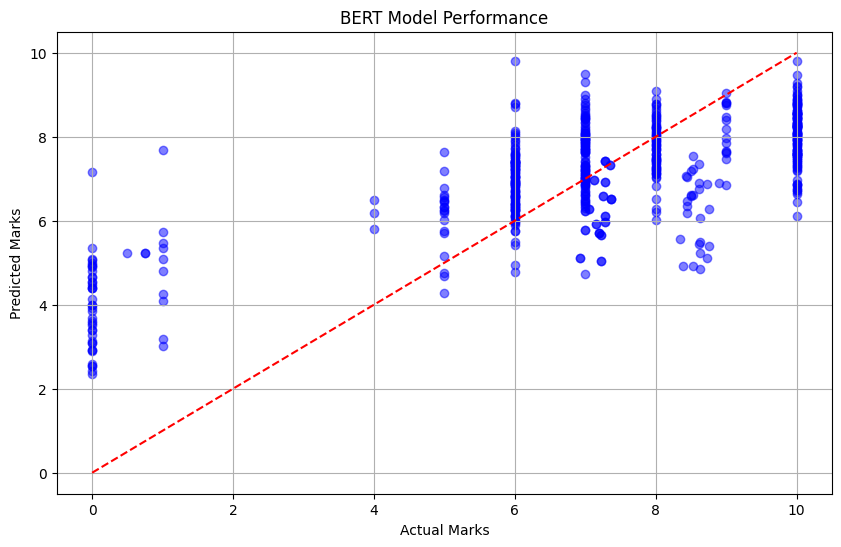

In [ ]:

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(actual_marks, predicted_marks, color='blue', alpha=0.5)
plt.plot([min(actual_marks), max(actual_marks)], [min(actual_marks), max(actual_marks)], color='red', linestyle='--')
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('BERT Model Performance')
plt.grid(True)
plt.show()

lstm

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, concatenate

# Load dataset
try:
    df = pd.read_csv('/content/student_evaluation_results (2).csv', encoding='latin-1')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('/content/student_evaluation_results (2).csv', encoding='utf-16')
    except UnicodeDecodeError:
        print("Could not decode file. Please check the encoding of the file.")

# Extract features and labels
questions = df['Questions'].values
model_answers = df['Answers'].values
student_answers = df['Student_Answer'].values
marks = df['Final_Score'].values

# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(questions.tolist() + model_answers.tolist() + student_answers.tolist())


In [ ]:

# Convert text to sequences
question_sequences = tokenizer.texts_to_sequences(questions)
model_sequences = tokenizer.texts_to_sequences(model_answers)
student_sequences = tokenizer.texts_to_sequences(student_answers)

# Pad sequences to a fixed length
max_seq_length = 100
question_sequences = pad_sequences(question_sequences, maxlen=max_seq_length)
model_sequences = pad_sequences(model_sequences, maxlen=max_seq_length)
student_sequences = pad_sequences(student_sequences, maxlen=max_seq_length)



In [ ]:

# Define model architecture
input_question = Input(shape=(max_seq_length,))
input_model_answer = Input(shape=(max_seq_length,))
input_student_answer = Input(shape=(max_seq_length,))

embedding_layer = Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100)

embedded_question = embedding_layer(input_question)
embedded_model_answer = embedding_layer(input_model_answer)
embedded_student_answer = embedding_layer(input_student_answer)

In [ ]:
lstm_layer = LSTM(128)

question_encoded = lstm_layer(embedded_question)
model_answer_encoded = lstm_layer(embedded_model_answer)
student_answer_encoded = lstm_layer(embedded_student_answer)

concatenated = concatenate([question_encoded, model_answer_encoded, student_answer_encoded])

output_layer = Dense(1, activation='linear')(concatenated)

model = Model(inputs=[input_question, input_model_answer, input_student_answer], outputs=output_layer)

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
history = model.fit(
    [question_sequences, model_sequences, student_sequences],
    marks,
    epochs=20,
    batch_size=32,
    validation_split=0.2)


import pickle
pickle.dump(model, open('answer_evaluation_model.pkl', 'wb'))
# Evaluate model
evaluation = model.evaluate([question_sequences, model_sequences, student_sequences], marks)

def evaluate_answer(question, model_answer, student_answer):
    question_seq = tokenizer.texts_to_sequences([question])
    model_seq = tokenizer.texts_to_sequences([model_answer])
    student_seq = tokenizer.texts_to_sequences([student_answer])

    question_seq = pad_sequences(question_seq, maxlen=max_seq_length)
    model_seq = pad_sequences(model_seq, maxlen=max_seq_length)
    student_seq = pad_sequences(student_seq, maxlen=max_seq_length)

    predicted_marks = model.predict([question_seq, model_seq, student_seq])[0][0]
    return predicted_marks



Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - loss: 50.6701 - mae: 6.6114 - val_loss: 27.7972 - val_mae: 3.8280
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 4.3033 - mae: 1.7453 - val_loss: 19.1996 - val_mae: 3.3461
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.8654 - mae: 1.5280 - val_loss: 25.2101 - val_mae: 3.6533
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.1190 - mae: 1.6230 - val_loss: 21.7826 - val_mae: 3.3989
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.6912 - mae: 1.5854 - val_loss: 21.0684 - val_mae: 3.3412
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.2391 - mae: 1.4846 - val_loss: 21.4739 - val_mae: 3.3679
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.6265 - mae: 1.5008 - val_loss: 21.4626 - val_mae: 3.3657
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.8845 - mae: 1.3816 - val_loss: 20.2848 - val_mae: 3.2924
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - lo

In [ ]:
# Example usage
question = "What is a pointer?"
model_answer = "Pointers are variables which stores the address of another variable. That variable may be a scalar (including another pointer), or an aggregate (array or structure). The pointed-to object may be part of a larger object, such as a field of a structure or an element in an array.	"
student_answer = "A pointer is a type of variable that holds the memory address of another variable."

predicted_marks = evaluate_answer(question, model_answer, student_answer)
print(f"Predicted marks: {predicted_marks}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
Predicted marks: 5.940916538238525


In [ ]:
import matplotlib.pyplot as plt
predicted_marks = []
for i in range(len(df)):
    pred = evaluate_answer(questions[i], model_answers[i], student_answers[i])
    predicted_marks.append(pred)



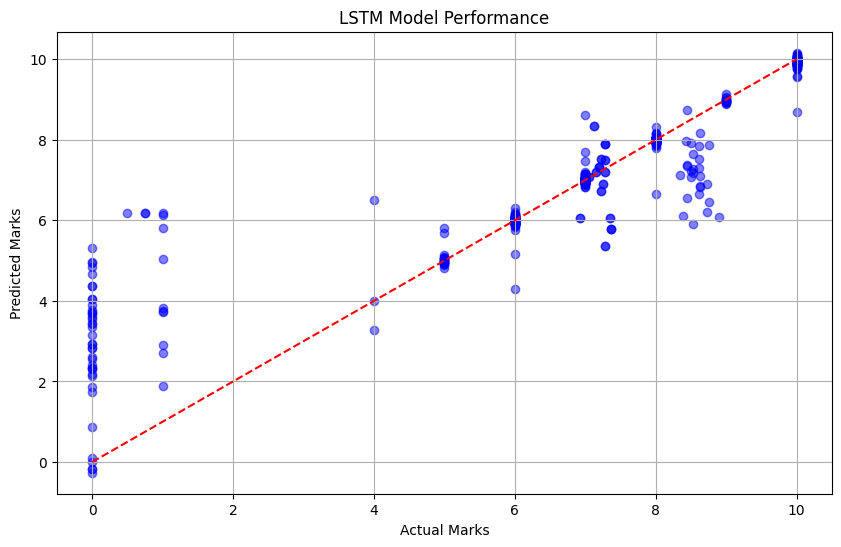

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(marks, predicted_marks, color='blue', alpha=0.5)
plt.plot([min(marks), max(marks)], [min(marks), max(marks)], color='red', linestyle='--')
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('LSTM Model Performance')
plt.grid(True)
plt.show()

cnn

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, concatenate


In [ ]:
# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(questions.tolist() + model_answers.tolist() + student_answers.tolist())

# Convert text to sequences
question_sequences = tokenizer.texts_to_sequences(questions)
model_sequences = tokenizer.texts_to_sequences(model_answers)
student_sequences = tokenizer.texts_to_sequences(student_answers)



In [ ]:

# Pad sequences to a fixed length
max_seq_length = 100
question_sequences = pad_sequences(question_sequences, maxlen=max_seq_length)
model_sequences = pad_sequences(model_sequences, maxlen=max_seq_length)
student_sequences = pad_sequences(student_sequences, maxlen=max_seq_length)

# Define model architecture with CNN
input_question = Input(shape=(max_seq_length,))
input_model_answer = Input(shape=(max_seq_length,))
input_student_answer = Input(shape=(max_seq_length,))

embedding_dim = 100
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim)

In [ ]:

cnn_layer = Conv1D(filters=64, kernel_size=3, activation='relu')

question_cnn = cnn_layer(embedding_layer(input_question))
model_answer_cnn = cnn_layer(embedding_layer(input_model_answer))
student_answer_cnn = cnn_layer(embedding_layer(input_student_answer))

# Global max pooling to reduce dimensions
question_pool = GlobalMaxPooling1D()(question_cnn)
model_answer_pool = GlobalMaxPooling1D()(model_answer_cnn)
student_answer_pool = GlobalMaxPooling1D()(student_answer_cnn)

# Concatenate the pooled features
concatenated = concatenate([question_pool, model_answer_pool, student_answer_pool])

# Output layer for regression
output_layer = Dense(1, activation='linear')(concatenated)

# Build the model
model = Model(inputs=[input_question, input_model_answer, input_student_answer], outputs=output_layer)


NameError: name 'Conv1D' is not defined

In [ ]:

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
model.fit([question_sequences, model_sequences, student_sequences], marks, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate model
evaluation = model.evaluate([question_sequences, model_sequences, student_sequences], marks)

# Example deployment
def evaluate_answer(question, model_answer, student_answer):
    question_seq = tokenizer.texts_to_sequences([question])
    model_seq = tokenizer.texts_to_sequences([model_answer])
    student_seq = tokenizer.texts_to_sequences([student_answer])

    question_seq = pad_sequences(question_seq, maxlen=max_seq_length)
    model_seq = pad_sequences(model_seq, maxlen=max_seq_length)
    student_seq = pad_sequences(student_seq, maxlen=max_seq_length)

    predicted_marks = model.predict([question_seq, model_seq, student_seq])[0][0]
    return predicted_marks


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.1751 - mae: 0.2820 - val_loss: 7.0007 - val_mae: 2.1338
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1243 - mae: 0.2466 - val_loss: 7.8038 - val_mae: 2.2186
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0795 - mae: 0.1848 - val_loss: 7.1718 - val_mae: 2.1347
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0502 - mae: 0.1516 - val_loss: 6.9643 - val_mae: 2.0962
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0417 - mae: 0.1417 - val_loss: 7.6039 - val_mae: 2.1865
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0479 - mae: 0.1284 - val_loss: 6.7979 - val_mae: 2.1056
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0352 - mae: 0.1132 - val_loss: 7.3342 - val_mae: 2.1773
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0461 - mae: 0.1299 - val_loss: 6.8016 - val_mae: 2.1032
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.029

In [ ]:
question = "What is a pointer?"
model_answer = "Pointers are variables which stores the address of another variable. That variable may be a scalar (including another pointer), or an aggregate (array or structure). The pointed-to object may be part of a larger object, such as a field of a structure or an element in an array.	"
student_answer = "A pointer is a type of variable that holds the memory address of another variable."
predicted_marks = evaluate_answer(question, model_answer, student_answer)
print(f"Predicted marks: {predicted_marks}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
Predicted marks: 6.122603893280029


In [ ]:
import matplotlib.pyplot as plt
predicted_marks = []
for i in range(len(df)):
    pred = evaluate_answer(questions[i], model_answers[i], student_answers[i])
    predicted_marks.append(pred)


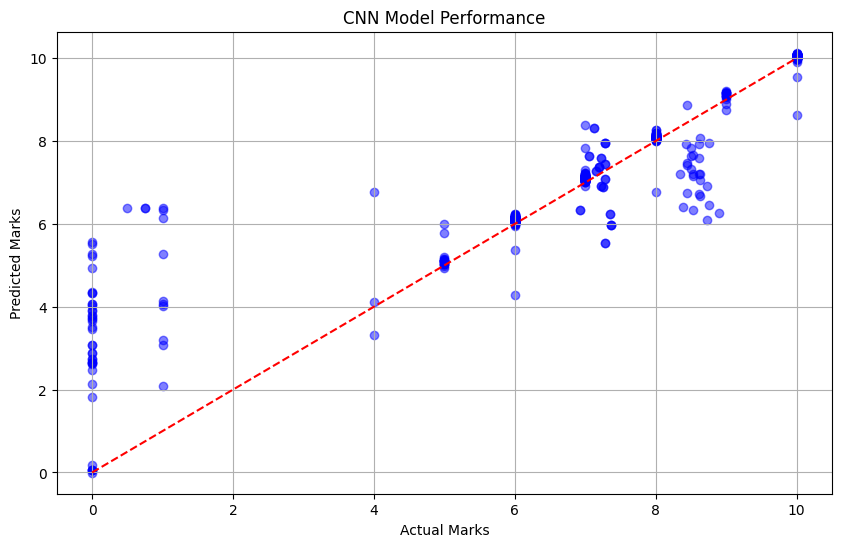

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(marks, predicted_marks, color='blue', alpha=0.5)
plt.plot([min(marks), max(marks)], [min(marks), max(marks)], color='red', linestyle='--')
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('CNN Model Performance')
plt.grid(True)
plt.show()

gru

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, GRU, Dense, concatenate



In [ ]:
# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(questions.tolist() + model_answers.tolist() + student_answers.tolist())

# Convert text to sequences
question_sequences = tokenizer.texts_to_sequences(questions)
model_sequences = tokenizer.texts_to_sequences(model_answers)
student_sequences = tokenizer.texts_to_sequences(student_answers)

# Pad sequences to a fixed length
max_seq_length = 100  # Example value; adjust based on your dataset
question_sequences = pad_sequences(question_sequences, maxlen=max_seq_length)
model_sequences = pad_sequences(model_sequences, maxlen=max_seq_length)
student_sequences = pad_sequences(student_sequences, maxlen=max_seq_length)

# Define model architecture with GRU
input_question = Input(shape=(max_seq_length,))
input_model_answer = Input(shape=(max_seq_length,))
input_student_answer = Input(shape=(max_seq_length,))

embedding_dim = 100  # Example value; adjust based on your dataset

embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim)

In [ ]:
# GRU layers for each input
gru_units = 128

question_gru = GRU(gru_units)(embedding_layer(input_question))
model_answer_gru = GRU(gru_units)(embedding_layer(input_model_answer))
student_answer_gru = GRU(gru_units)(embedding_layer(input_student_answer))

# Concatenate the outputs
concatenated = concatenate([question_gru, model_answer_gru, student_answer_gru])

# Output layer for regression
output_layer = Dense(1, activation='linear')(concatenated)

# Build the model
model = Model(inputs=[input_question, input_model_answer, input_student_answer], outputs=output_layer)

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Train model
model.fit([question_sequences, model_sequences, student_sequences], marks, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate model
evaluation = model.evaluate([question_sequences, model_sequences, student_sequences], marks)

# Example deployment
def evaluate_answer(question, model_answer, student_answer):
    question_seq = tokenizer.texts_to_sequences([question])
    model_seq = tokenizer.texts_to_sequences([model_answer])
    student_seq = tokenizer.texts_to_sequences([student_answer])

    question_seq = pad_sequences(question_seq, maxlen=max_seq_length)
    model_seq = pad_sequences(model_seq, maxlen=max_seq_length)
    student_seq = pad_sequences(student_seq, maxlen=max_seq_length)

    predicted_marks = model.predict([question_seq, model_seq, student_seq])[0][0]
    return predicted_marks


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 56.5678 - mae: 7.2219 - val_loss: 27.6152 - val_mae: 3.8146
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 9.8062 - mae: 2.4961 - val_loss: 16.5638 - val_mae: 3.2454
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 4.2805 - mae: 1.6655 - val_loss: 16.9796 - val_mae: 3.0394
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 2.7200 - mae: 1.3888 - val_loss: 8.0475 - val_mae: 2.3185
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.8734 - mae: 1.1260 - val_loss: 5.8072 - val_mae: 2.1624
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.4822 - mae: 1.0081 - val_loss: 7.4023 - val_mae: 2.2654
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.4151 - mae: 0.9322 - val_loss: 6.8403 - val_mae: 2.2668
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9680 - mae: 0.7496 - val_loss: 6.6767 - val_mae: 2.2871
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0

In [ ]:
# Example usage
question = "What is a pointer?"
model_answer = "Pointers are variables which stores the address of another variable. That variable may be a scalar (including another pointer), or an aggregate (array or structure). The pointed-to object may be part of a larger object, such as a field of a structure or an element in an array.	"
student_answer = "A pointer is a type of variable that holds the memory address of another variable."
# Use the original Keras tokenizer for evaluate_answer function
predicted_marks = evaluate_answer(question, model_answer, student_answer) # Use the original evaluate_answer function
print(f"Predicted marks: {predicted_marks}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
Predicted marks: 6.015471935272217


In [ ]:
import matplotlib.pyplot as plt
predicted_marks = []
for i in range(len(df)):
    pred = evaluate_answer(questions[i], model_answers[i], student_answers[i])
    predicted_marks.append(pred)


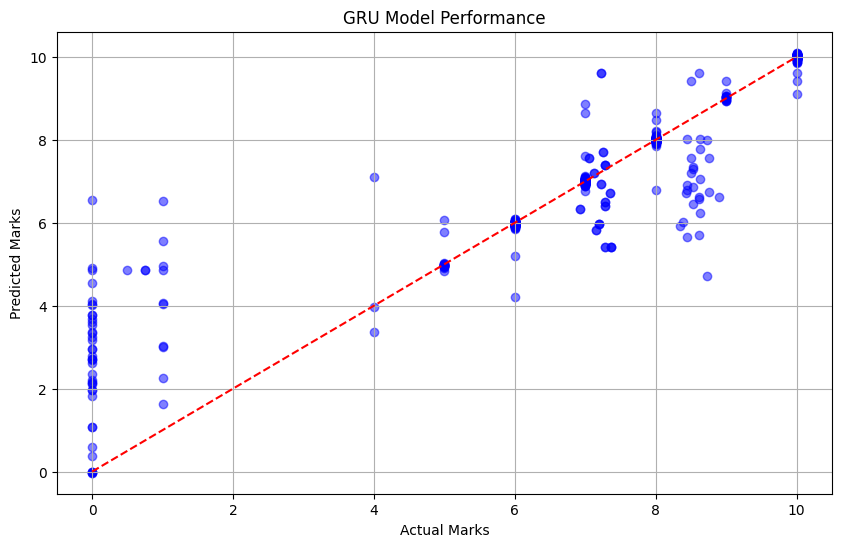

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(marks, predicted_marks, color='blue', alpha=0.5)
plt.plot([min(marks), max(marks)], [min(marks), max(marks)], color='red', linestyle='--')
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('GRU Model Performance')
plt.grid(True)
plt.show()

comparision

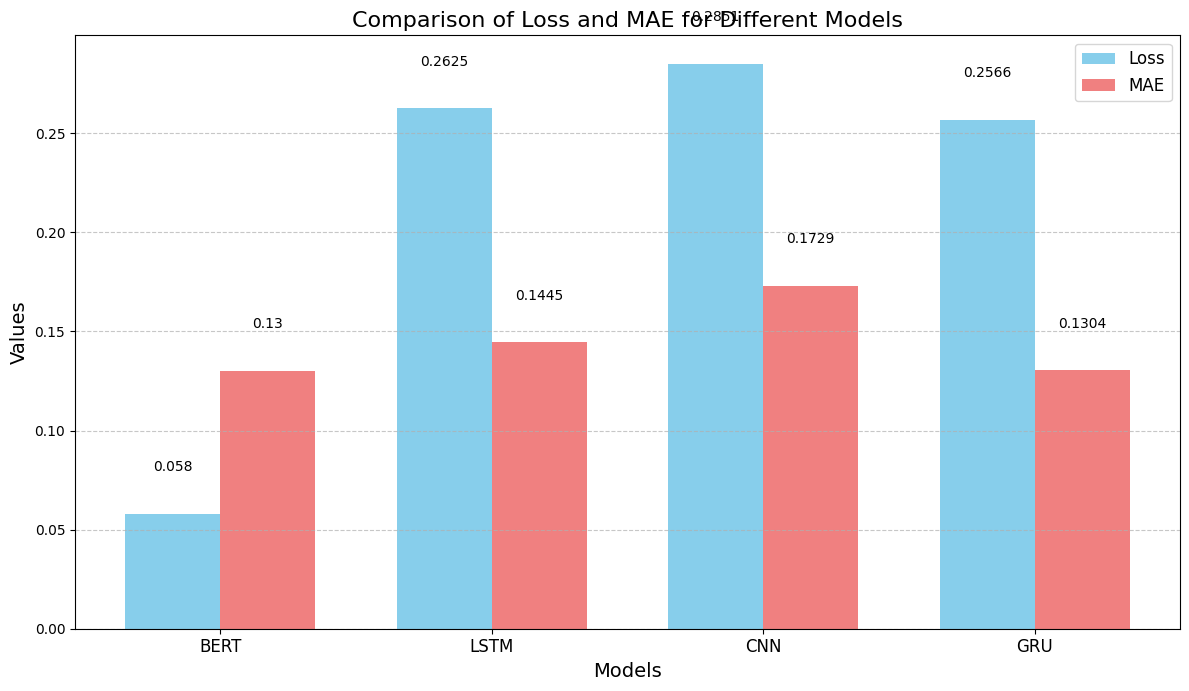

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['BERT', 'LSTM', 'CNN', 'GRU']

# Metrics
losses = [0.0580, 0.2625, 0.2851, 0.2566]
mae = [0.1300, 0.1445, 0.1729, 0.1304]

# Set up the bar width and positions
bar_width = 0.35
index = np.arange(len(models))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 7))

# Light colors for bars
bar1 = ax.bar(index - bar_width/2, losses, bar_width, color='skyblue', label='Loss')
bar2 = ax.bar(index + bar_width/2, mae, bar_width, color='lightcoral', label='MAE')

# Adding labels and title
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
ax.set_title('Comparison of Loss and MAE for Different Models', fontsize=16)
ax.set_xticks(index)
ax.set_xticklabels(models, fontsize=12)
ax.legend(fontsize=12)

# Add grid lines for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adding value labels on top of bars
for bar in bar1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 4), ha='center', va='bottom', fontsize=10)
for bar in bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 4), ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()
